In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import agreement
from sklearn.metrics import cohen_kappa_score
from scipy.stats.stats import pearsonr

In [135]:
opinions = ['OnePlus has good battery life and brilliant processing capabilities', 
            'iPhones is not good in display and camera, but it is better than Samsung',
            'OnePlus has brilliant video streaming quality because of amazing graphics processor'
           ]
# +ve => 1; 
# -ve and neutral => 0
raters = [[0,-1,1],[0, 0, 1],[0,-1,1]]

print(cohen_kappa_score(raters[0], raters[1]))
print(cohen_kappa_score(raters[1], raters[2]))
print(cohen_kappa_score(raters[0], raters[2]))


'''
Opinions vs Raters
Opinions | Rater A | Rater B | Rater C |
----------------------------------------
opinionA |    0    |    0    |    0    |
opinionB |   -1    |    0    |   -1    | 
opinionC |    1    |    1    |    1    |
'''

0.5
0.5
1.0


'\nOpinions vs Raters\nOpinions | Rater A | Rater B | Rater C |\n----------------------------------------\nopinionA |    0    |    0    |    0    |\nopinionB |   -1    |    0    |   -1    | \nopinionC |    1    |    1    |    1    |\n'

In [136]:
import math
def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_correlation(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

print(pearson_correlation(raters[0], raters[1]))
print(pearson_correlation(raters[1], raters[2]))
print(pearson_correlation(raters[0], raters[2]))
print("####")
print(np.corrcoef(raters[0], raters[1])[0,1])
print(np.corrcoef(raters[1], raters[2])[0,1])
print(np.corrcoef(raters[0], raters[2])[0,1])


0.8660254037844385
0.8660254037844385
1.0
####
0.8660254037844385
0.8660254037844385
1.0


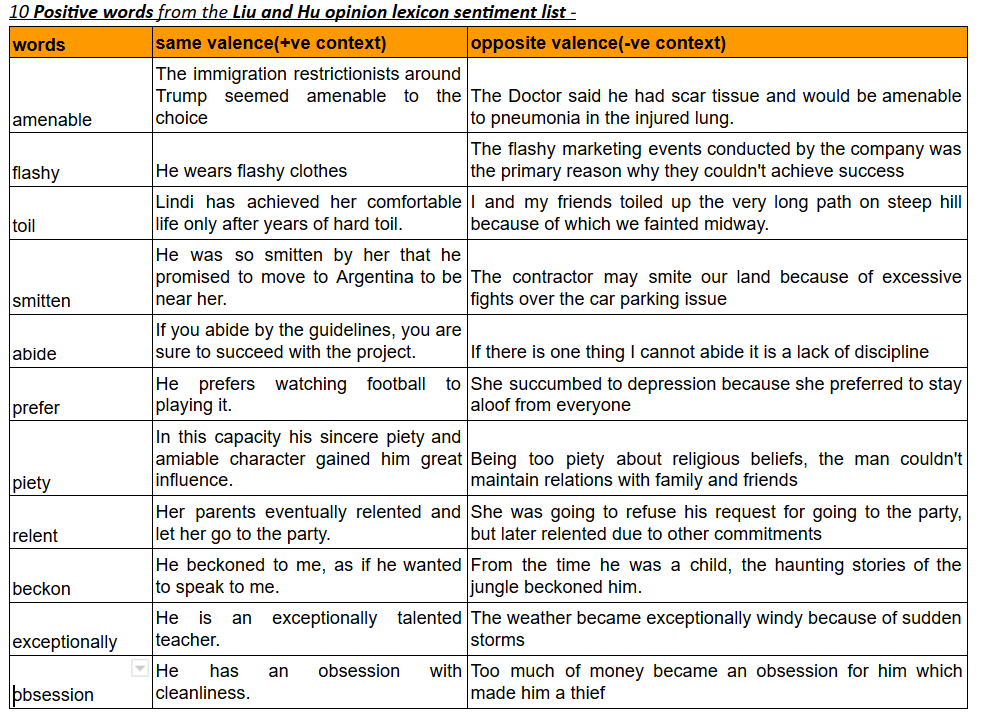

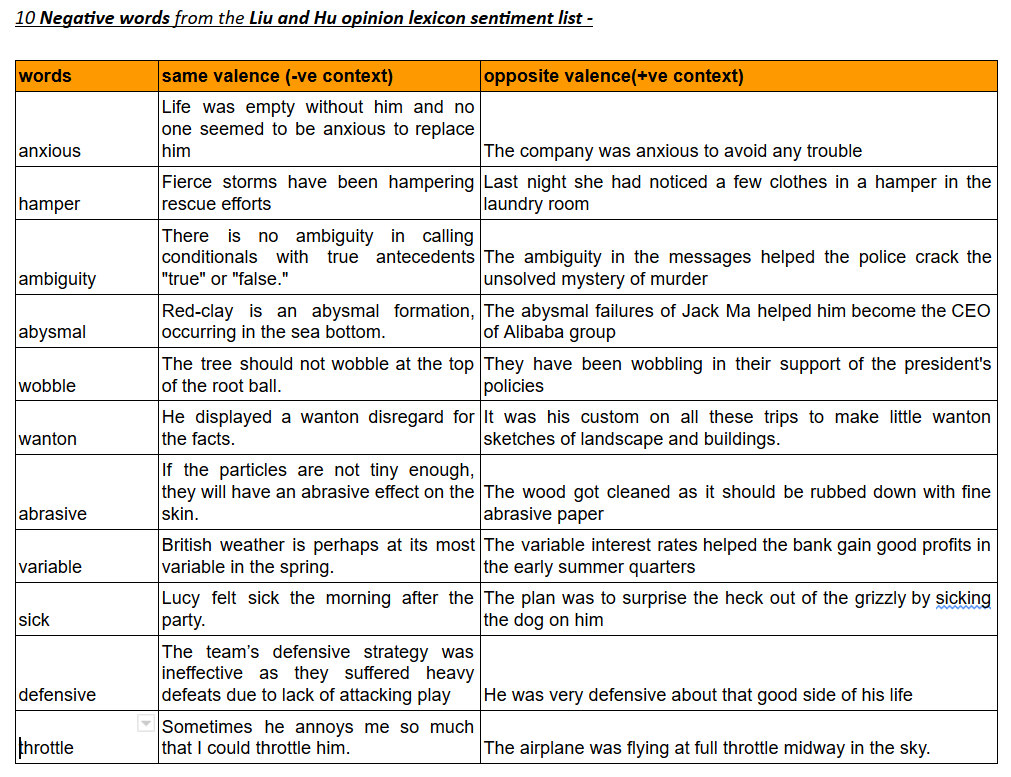

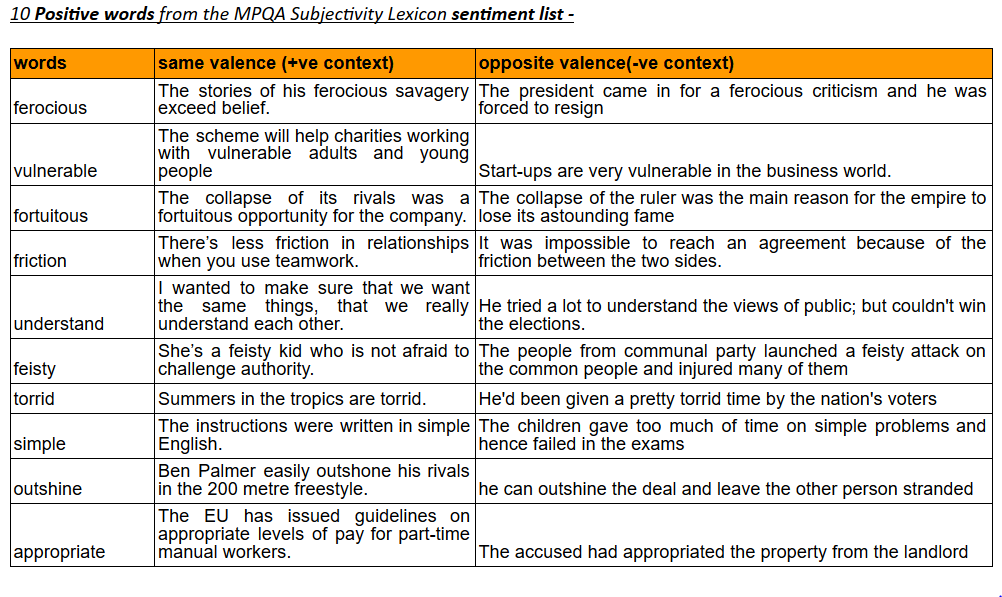

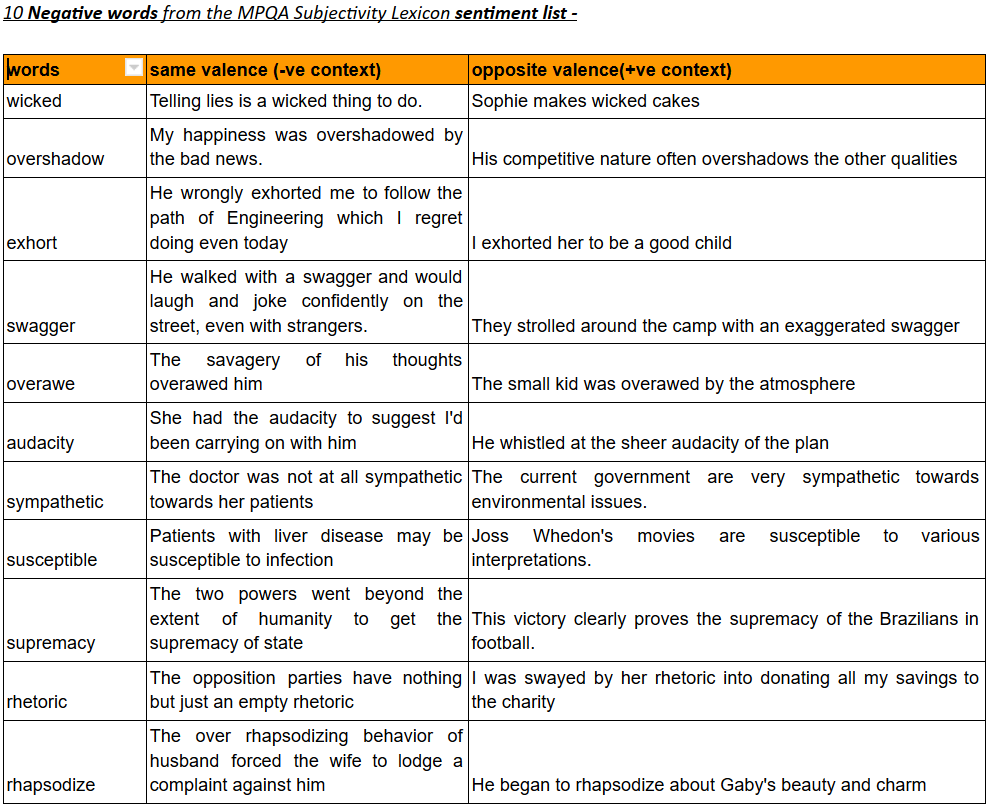

In [223]:
#q3
# http://andybromberg.com/sentiment-analysis-python/
# Andy Bromberg's Simple Sentiment Analysis System
# Uses data from Pang & Lee (2005)
# Uses a Naive Bayes Classifier Train the System
#  NB Updated 2016 for package changes around scores

import re, math, collections, itertools, sys, os
import nltk, nltk.classify.util, nltk.metrics
from nltk.classify import NaiveBayesClassifier, svm
from nltk.metrics import BigramAssocMeasures, scores
from nltk.probability import FreqDist, ConditionalFreqDist
from pathlib import Path
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import precision

#__location__ = os.path.realpath(os.path.join(os.getcwd(), os.path.dirname(__file__)))
#__location__ = os.path.realpath(os.path.join
#__location__ = Path().resolve()  # /home/skovorodkin/stack/scripts/1.py
#print(__location__)

cwd = Path().absolute()
__location__ = cwd/'XLect10.Progs'
print(f'File path : {__location__}')


File path : C:\Users\Chirag\Desktop\UCD_materials\text_analytics\week9\Content\XLect10.Progs


In [224]:
#for sentences
def pre_process(text):
    def remove_stop_words(pre_processed_text):
        if pre_processed_text == None or pre_processed_text == []:
            print("Error..Exiting")
        else:
            stopwds = set(stopwords.words('english'))
            stext = pre_processed_text.split(' ')
            rtext = ''
            for ele in stext:
                if ele not in stopwds:
                    rtext += ele + ' '
        return rtext #this returns each string
    final_res = []
    for t in text:
         final_res.append(remove_stop_words(t))
    return final_res

#for words
def wremove_stop_words(pre_processed_text):
        if not pre_processed_text:
            print("Error..Exiting")
        else:
            stopwds = set(stopwords.words('english'))
            rtext = ''
            if pre_processed_text not in stopwds:
                rtext += pre_processed_text + ' '
        return rtext



In [227]:
from sklearn.svm import LinearSVC
def evaluate_features(feature_select):
    #reading pre-labeled input and splitting into lines
    negSentences = open(os.path.join(__location__, 'rt-polarity-neg.txt'), 'r', encoding='utf8')
    posSentences = open(os.path.join(__location__, 'rt-polarity-pos.txt'), 'r', encoding='utf8')
    negSentences = re.split(r'\n', negSentences.read())
    posSentences = re.split(r'\n', posSentences.read())
    print(type(negSentences))
    negSentences = pre_process(negSentences)
    print(type(posSentences))
    posSentences = pre_process(posSentences)
    
    posFeatures = []
    negFeatures = []
    # breaks up the sentences into lists of individual words
    # creates instance structures for classifier
    for i in posSentences:
        posWords = re.findall(r"[\w']+|[.,!?;]", i)  
        posWords = [feature_select(posWords), 'pos']
        posFeatures.append(posWords)
    for i in negSentences:
        negWords = re.findall(r"[\w']+|[.,!?;]", i)
        negWords = [feature_select(negWords), 'neg']
        negFeatures.append(negWords)
        
    posCutoff = int(math.floor(len(posFeatures)*3/4))
    negCutoff = int(math.floor(len(negFeatures)*3/4))
    trainFeatures = posFeatures[:posCutoff] + negFeatures[:negCutoff]
    testFeatures = posFeatures[posCutoff:] + negFeatures[negCutoff:]
    
    #Runs the classifier on the testFeatures
    #classifier = NaiveBayesClassifier.train(trainFeatures)
    
    classifier = nltk.classify.SklearnClassifier(LinearSVC())
    classifier.train(trainFeatures)
    
    #classifier = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    #SVM.fit(trainFeatures,testFeatures)# predict the labels on validation dataset
    
    #Sets up labels to look at output
    referenceSets = collections.defaultdict(set)
    testSets = collections.defaultdict(set)

    for i, (features, label) in enumerate(testFeatures): # enumerate adds number-count to each item
        referenceSets[label].add(i)               # recorded polarity for these test sentences
        predicted = classifier.classify(features) # classifiers' proposed polarity for tests
        testSets[predicted].add(i)

    #Outputs
    print('train on %s instances, test on %s instances'% (len(trainFeatures), len(testFeatures)))
    print('accuracy:', nltk.classify.util.accuracy(classifier, testFeatures))
    print('pos precision:', scores.precision(referenceSets['pos'], testSets['pos']))
    print('pos recall:', scores.recall(referenceSets['pos'], testSets['pos']))
    print('neg precision:', scores.precision(referenceSets['neg'], testSets['neg']))
    print('neg recall:', scores.recall(referenceSets['neg'], testSets['neg']))
    #classifier.show_most_informative_features(10)

def make_full_dict(words):
    return dict([(word, False) for word in words])

print('using all words as features')
evaluate_features(make_full_dict)

using all words as features
<class 'list'>
<class 'list'>
train on 7998 instances, test on 2666 instances
accuracy: 0.5
pos precision: 0.5
pos recall: 1.0
neg precision: None
neg recall: 0.0


TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-218-2cf6bbf4ed00>, line 28)